# Bank Fraud Detection

## Exploring the Data

In [ ]:
import pandas as pd
import numpy as np

In [172]:
raw_data = pd.read_csv("fraud_dataset_example.csv")
raw_data = raw_data.drop(columns=["isFlaggedFraud"]) # Drops isFlaggedFraud column

In [173]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


In [174]:
raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


In [175]:
num_df = raw_data.select_dtypes(include=["number"]).copy() # Only numeric columns

In [176]:
num_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.076010,0.004918,0.004737,0.009535,0.011181,-0.051498
amount,0.076010,1.000000,-0.010663,-0.016614,0.244933,0.372792,0.036008
oldbalanceOrg,0.004918,-0.010663,1.000000,0.998963,0.103087,0.072234,-0.004235
newbalanceOrig,0.004737,-0.016614,0.998963,1.000000,0.104622,0.071242,-0.010546
oldbalanceDest,0.009535,0.244933,0.103087,0.104622,1.000000,0.938971,-0.009208
newbalanceDest,0.011181,0.372792,0.072234,0.071242,0.938971,1.000000,-0.006353
isFraud,-0.051498,0.036008,-0.004235,-0.010546,-0.009208,-0.006353,1.000000


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>]], dtype=object)

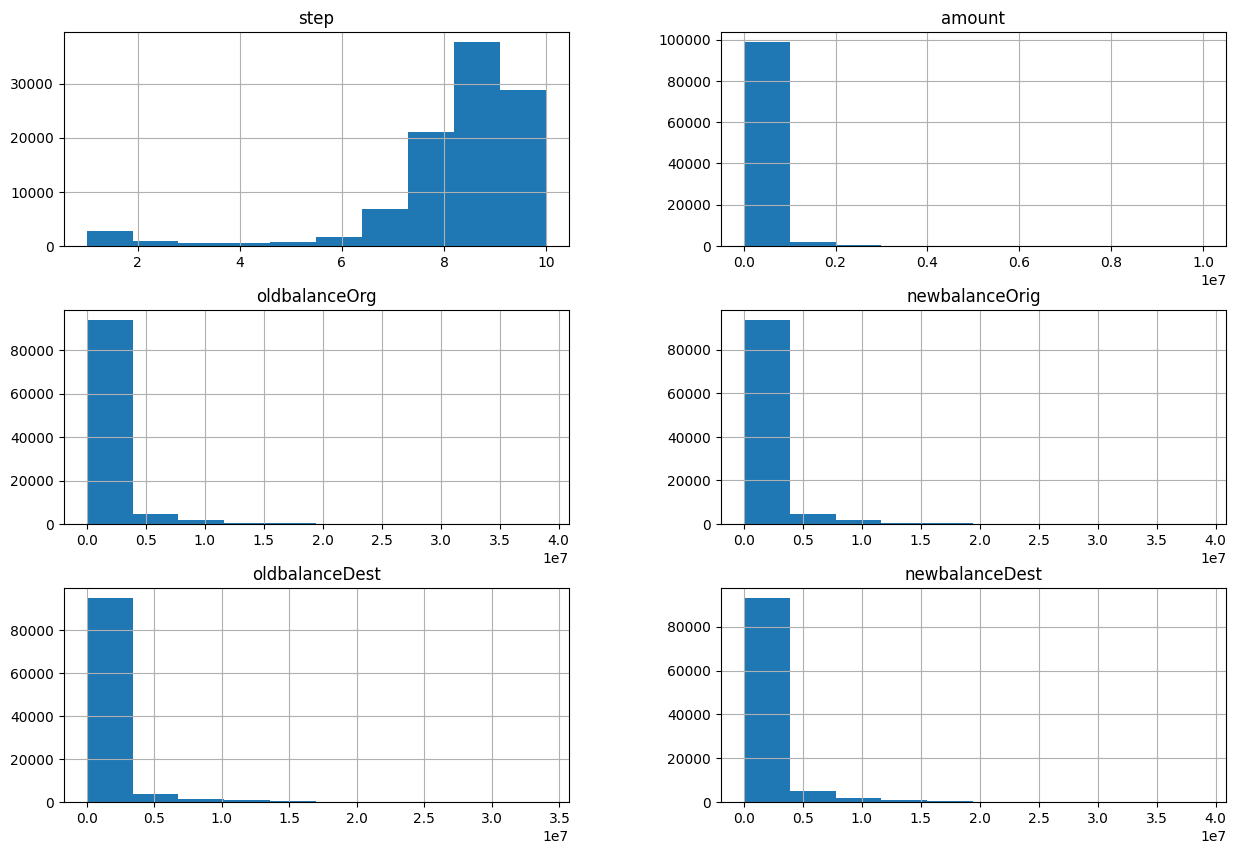

In [177]:
num_df.drop(columns=["isFraud"]).select_dtypes(include=["number"]).hist(figsize=(15, 10)) # 

In [178]:
raw_data["step"].value_counts().sort_index()

step
1      2708
2      1014
3       552
4       565
5       665
6      1660
7      6837
8     21097
9     37628
10    28887
Name: count, dtype: int64

In [179]:
raw_data["type"].value_counts()

type
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

## Preparing the Data

In [180]:
X = raw_data.drop(columns=["isFraud"])
y = raw_data["isFraud"]

In [181]:
cnt = np.bincount(y)
print("0s:", cnt[0])
print("1s:", cnt[1])

0s: 101497
1s: 116


### Over-Sampling the Data

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [183]:
y_train_cnt = np.bincount(y_train)
print(y_train_cnt[1] / (y_train_cnt[0] + y_train_cnt[1]))

0.0011440521589371386


In [184]:
y_test_cnt = np.bincount(y_test)
print(y_test_cnt[1] / (y_test_cnt[0] + y_test_cnt[1]))

0.0011317226787383753


In [185]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [187]:
cnt_os = np.bincount(y_train)
print("0s:", cnt_os[0])
print("1s:", cnt_os[1])

0s: 81197
1s: 81197


In [188]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,7,PAYMENT,5162.32,C530975525,198599.87,193437.56,M1176943131,0.00,0.00
1,10,CASH_OUT,341457.57,C1686930333,23667.00,0.00,C601893033,203224.08,894455.75
2,10,PAYMENT,12926.53,C1250093234,0.00,0.00,M615849889,0.00,0.00
3,10,TRANSFER,41428.95,C1679520808,0.00,0.00,C1140712423,506663.38,548092.33
4,9,CASH_OUT,114415.15,C1775590523,0.00,0.00,C25823731,436605.04,1028465.75
...,...,...,...,...,...,...,...,...,...
162389,6,CASH_OUT,33332.86,C685428529,33332.86,0.00,C1626759869,31002.00,0.00
162390,6,TRANSFER,25975.86,C864622150,25975.86,0.00,C41792607,0.00,0.00
162391,9,CASH_OUT,11308.00,C921533797,11308.00,0.00,C424669538,0.00,302550.56
162392,1,TRANSFER,235238.66,C1872047468,235238.66,0.00,C116289363,0.00,0.00


### Encoding and Scaling the Data

In [168]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelBinarizer

In [189]:
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

oe = OrdinalEncoder(categories=[[1,2,3,4,5,6,7,8,9,10]]).fit(X_train[["step"]])
lb = LabelBinarizer().fit(X_train["type"])
ss = StandardScaler().fit(X_train[num_cols])

In [190]:
def transform_data(data):
    df = data.copy()

    step_df = pd.DataFrame(oe.transform(df[["step"]]), columns=["step"])
    type_df = pd.DataFrame(lb.transform(df["type"]), columns=[col.lower() for col in lb.classes_])
    num_df = pd.DataFrame(ss.transform(df[num_cols]), columns=num_cols)

    return pd.concat([step_df, type_df, num_df], axis=1)

In [191]:
X_train = transform_data(X_train)
X_test = transform_data(X_test)

In [192]:
X_test

,step,cash_in,cash_out,debit,payment,transfer,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,7.0,1,0,0,0,0,-0.148307,0.873891,1.119021,-0.155607,-0.354762
1,0.0,0,0,0,1,0,-0.308934,-0.292449,-0.217578,-0.283742,-0.378858
2,8.0,0,0,0,1,0,-0.315592,-0.299171,-0.221623,-0.283742,-0.378858
3,6.0,0,0,0,1,0,-0.315234,-0.256561,-0.176200,-0.283742,-0.378858
4,8.0,0,1,0,0,0,-0.079126,-0.293214,-0.223269,-0.267173,-0.265762
...,...,...,...,...,...,...,...,...,...,...,...
20318,6.0,0,0,0,1,0,-0.319384,-0.270442,-0.189092,-0.283742,-0.378858
20319,6.0,0,0,0,0,1,0.033905,-0.303717,-0.223269,0.549983,0.420018
20320,7.0,0,0,0,1,0,-0.320321,0.384752,0.512398,-0.283742,-0.378858
20321,8.0,0,1,0,0,0,-0.093624,-0.303714,-0.223269,0.475432,0.293594


## Building Models

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

A function to print basic classification metrics (accuracy, precision, recall, F1 score) and display a confusion matrix: 

In [197]:
def plot_metrics(model, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
    disp.plot()

Accuracy: 0.9210746444914629
Precision: 0.01353846153846154
Recall: 0.9565217391304348
F1 Score: 0.02669902912621359


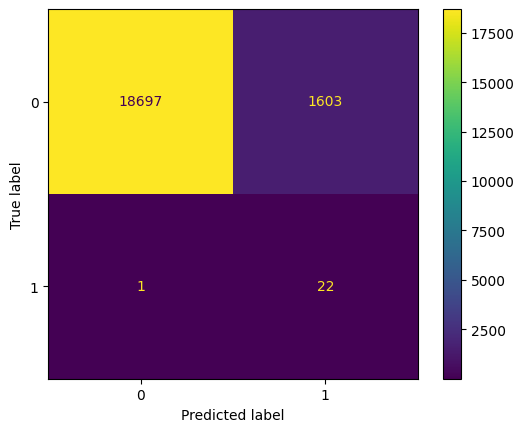

In [201]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plot_metrics(lr, y_pred)

Accuracy: 0.9595532155685677
Precision: 0.02497027348394768
Recall: 0.9130434782608695
F1 Score: 0.04861111111111111


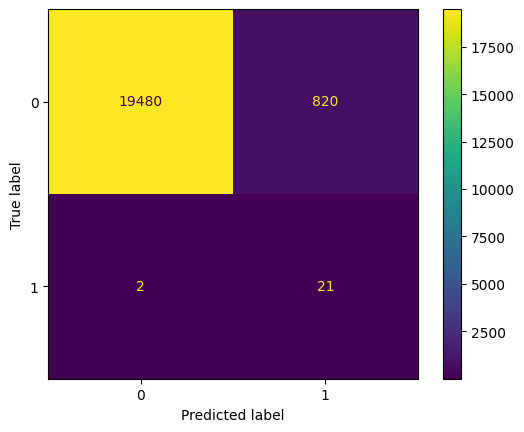

In [295]:
y_pred = (lr.predict_proba(X_test)[:, 1] >= 0.65).astype(bool)
plot_metrics(lr, y_pred)

In [ ]:
params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": np.linspace(0, 2, 8),
    "class_weight": [None, {0: 1.0, 1:2.0}]
}

scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
lr_grid = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=params, scoring=scorer)

lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_test)

plot_metrics(lr_grid, y_pred)

In [231]:
lr_grid.best_params_

{'C': 0.2857142857142857, 'class_weight': {0: 1.0, 1: 2.0}, 'penalty': 'l2'}

### KNN

Accuracy: 0.9973429119716577
Precision: 0.19607843137254902
Recall: 0.43478260869565216
F1 Score: 0.2702702702702703


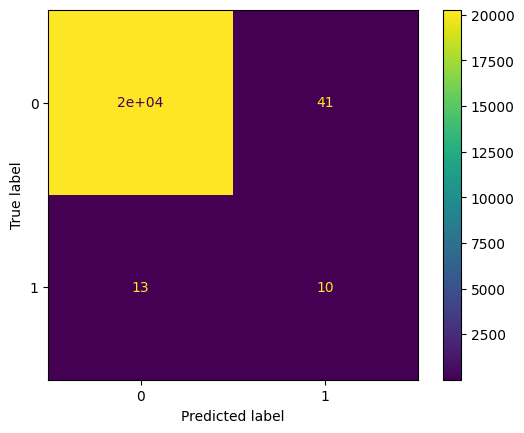

In [298]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

plot_metrics(knc, y_pred)

Accuracy: 0.9985730453181125
Precision: 0.36363636363636365
Recall: 0.34782608695652173
F1 Score: 0.35555555555555557


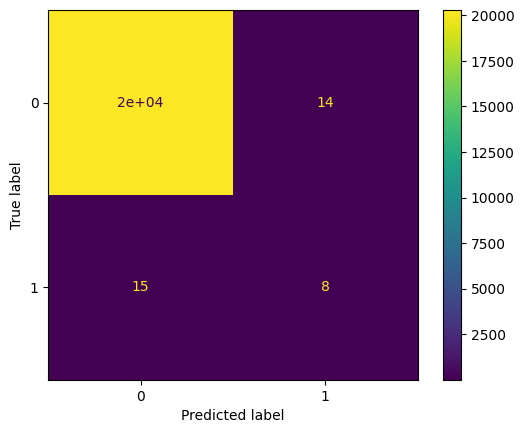

In [300]:
params = {
    "n_neighbors": [2, 4, 6, 8, 10]
}

scorer = make_scorer(recall_score, pos_label=1)
knc_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring=scorer)
knc_grid.fit(X_train, y_train)
y_pred = knc_grid.predict(X_test)

plot_metrics(knc, y_pred)

### SVC

C:\Users\noah.frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9248142498646853
Precision: 0.014202711426726921
Recall: 0.9565217391304348
F1 Score: 0.027989821882951654


C:\Users\noah.frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


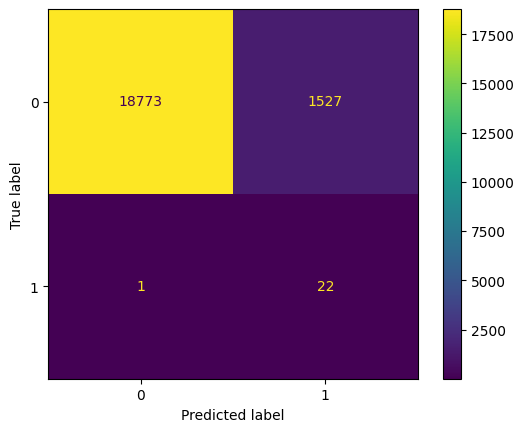

In [297]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

plot_metrics(lsvc, y_pred)

Accuracy: 0.999212714658269
Precision: 0.6296296296296297
Recall: 0.7391304347826086
F1 Score: 0.68


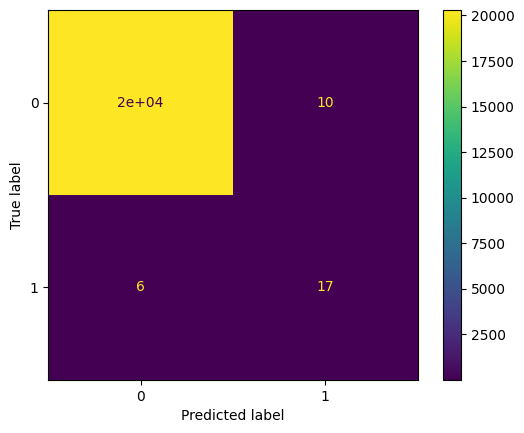

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

plot_metrics(dtc, y_pred)

Accuracy: 0.9596024209024259
Precision: 0.027251184834123223
Recall: 1.0
F1 Score: 0.0530565167243368


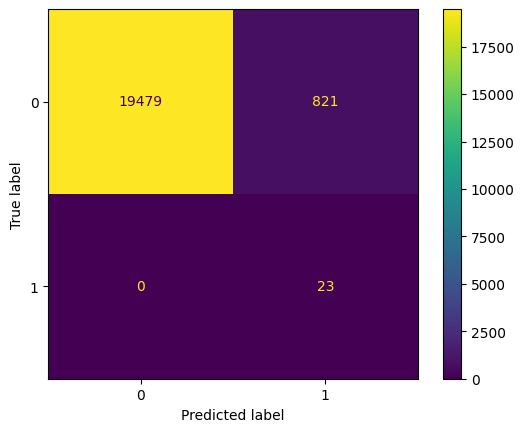

In [250]:
# params = {
#     # "max_depth": [10, 20, 30],
#     "min_samples_split": [5, 10, 15],
#     "min_samples_leaf": [3, 6, 9],
#     "class_weight": [None, {0: 2.0, 1:1.0}, {0: 1.0, 1:2.0}, {0: 4.0, 1:1.0}],
#     "splitter": ["best"],
#     "max_leaf_nodes": [10]
#     # ,"min_impurity_decrease": np.linspace(0, 0.5, 10)
# }

# params = {
#     "max_depth": [10, 20, 30],
#     "min_samples_split": [10, 25, 50],
#     "min_samples_leaf": [5, 10, 15],
#     "class_weight": [None, {0: 2.0, 1:1.0}, {0: 1.0, 1:2.0}],
#     "splitter": ["best", "random"],
#     "max_leaf_nodes": [50, 100, 150],
#     "min_impurity_decrease": np.linspace(0, 0.5, 10)
# }

params = {
    'class_weight': [None],
    'max_depth': [10],
    'max_leaf_nodes': [10],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [5],
    'min_samples_split': [10],
    'splitter': ['best']
}

scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
dtc_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring=scorer)

dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_test)

plot_metrics(dtc_grid, y_pred)

In [249]:
dtc_grid.best_params_

{'class_weight': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

Accuracy: 0.9994095359937017
Precision: 1.0
Recall: 0.4782608695652174
F1 Score: 0.6470588235294118


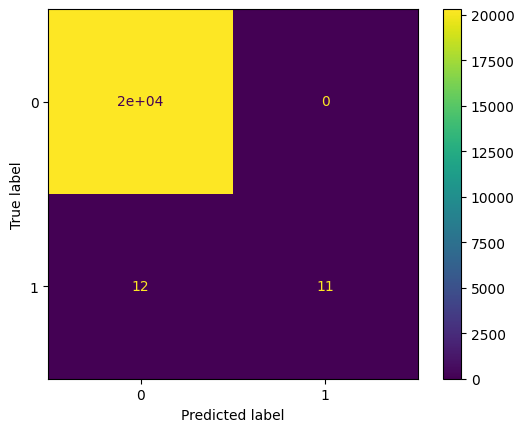

In [204]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

plot_metrics(rfc, y_pred)

Accuracy: 0.9967032426315012
Precision: 0.23809523809523808
Recall: 0.8695652173913043
F1 Score: 0.37383177570093457


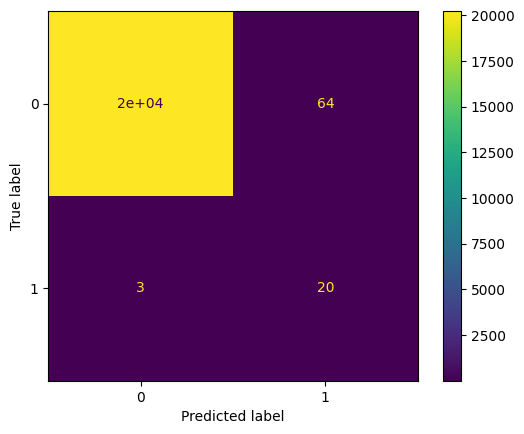

In [289]:
y_pred = (rfc.predict_proba(X_test)[:, 1] >= 0.05).astype(bool)
plot_metrics(rfc, y_pred)

Accuracy: 0.9916350932441077
Precision: 0.10270270270270271
Recall: 0.8260869565217391
F1 Score: 0.18269230769230768


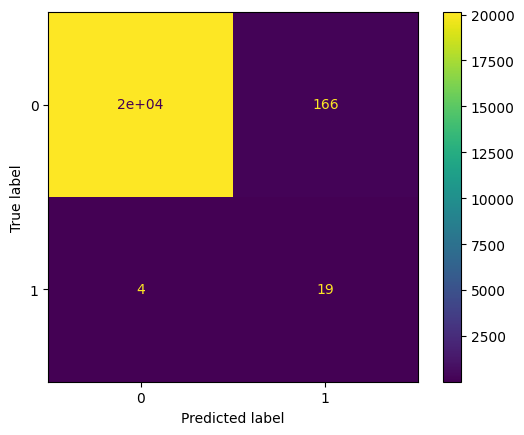

In [205]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=400)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

plot_metrics(nn, y_pred)

Accuracy: 0.975938591743345
Precision: 0.04133858267716536
Recall: 0.9130434782608695
F1 Score: 0.07909604519774012


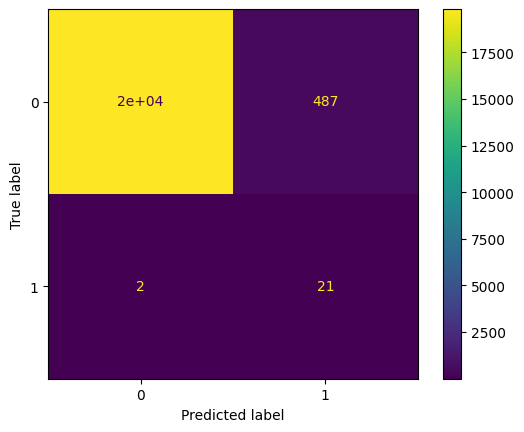

In [285]:
y_pred = (nn.predict_proba(X_test)[:, 1] >= 0.05).astype(bool)
plot_metrics(nn, y_pred)